# Linear Regression


In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸基本概念

#### 直線

$$f(x) = 1.2x + 0.8$$



In [91]:
#準備 50 個點
#5-0/50 = 0.1 +....
# 0~5線性切割
x = np.linspace(0, 5, 50)
print(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


In [92]:
y = 1.2*x + 0.8
y

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])

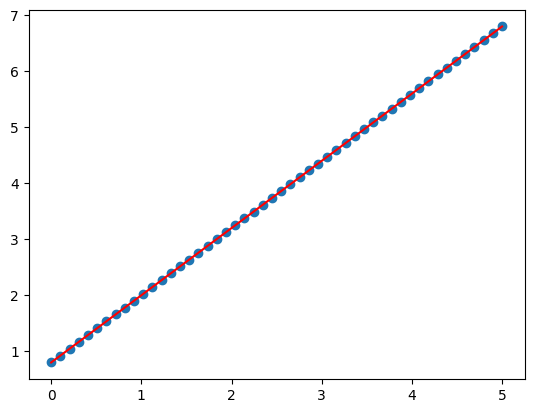

In [93]:
#畫圖
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### add noise 

$$f(x) + \varepsilon(x)$$


In [94]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
print(y)

[ 9.40025238e-01 -3.17801264e-03  1.42204426e+00 -8.00424901e-03
  1.52304928e+00  2.31050743e+00  2.08033322e+00  1.84125990e+00
  3.16574231e-01  1.88645161e+00  2.20655899e+00  2.72193053e+00
  2.92555500e+00  2.76204036e+00  2.76256427e+00  3.01648722e+00
  1.28359011e+00  2.80000646e+00  2.64424145e+00  2.61767341e+00
  2.22735409e+00  3.43286763e+00  3.92055601e+00  3.17256562e+00
  3.74478896e+00  2.74364253e+00  3.40683990e+00  4.41542507e+00
  3.46138846e+00  4.26422592e+00  5.01890455e+00  4.75522351e+00
  6.17626534e+00  4.81178309e+00  4.90755717e+00  4.89535254e+00
  5.66866180e+00  4.68363268e+00  5.66771100e+00  6.51625867e+00
  6.54112780e+00  5.24364262e+00  5.94546077e+00  6.27046635e+00
  4.27955813e+00  6.89667977e+00  5.96273233e+00  7.07516144e+00
  6.64916464e+00  8.12212084e+00]


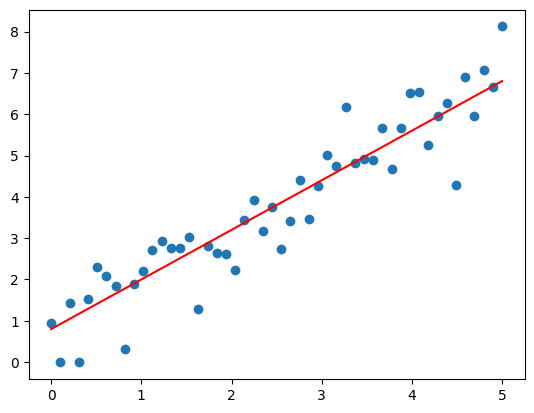

In [95]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [96]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [97]:
regr

LinearRegression()

要求資料轉換<br>

$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$


矩陣的概念

In [80]:
print(x.shape)
X = x.reshape(-1,1)
X.shape

(50,)


(50, 1)

In [81]:
# y:實際值
regr.fit(X,y)

LinearRegression()

In [82]:
# Y:預測值
Y = regr.predict(X)
print(Y)

[0.79530137 0.92335102 1.05140068 1.17945033 1.30749999 1.43554965
 1.5635993  1.69164896 1.81969861 1.94774827 2.07579792 2.20384758
 2.33189723 2.45994689 2.58799654 2.7160462  2.84409585 2.97214551
 3.10019517 3.22824482 3.35629448 3.48434413 3.61239379 3.74044344
 3.8684931  3.99654275 4.12459241 4.25264206 4.38069172 4.50874138
 4.63679103 4.76484069 4.89289034 5.02094    5.14898965 5.27703931
 5.40508896 5.53313862 5.66118827 5.78923793 5.91728759 6.04533724
 6.1733869  6.30143655 6.42948621 6.55753586 6.68558552 6.81363517
 6.94168483 7.06973448]


In [83]:
#了解你的訓練參數
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

0.20700756691772576


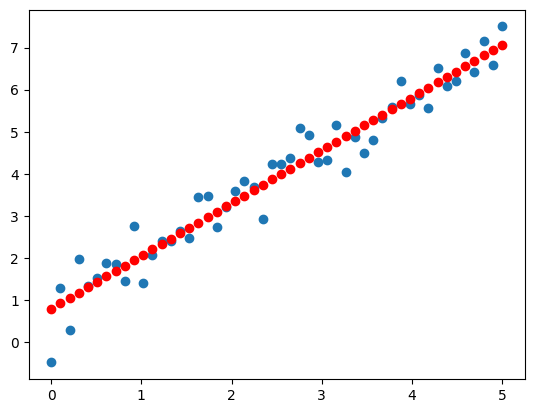

In [84]:
plt.scatter(x, y) #原本 
plt.plot(x, Y, 'ro') #預測
#calculate mse
mse = np.sum((Y-y)**2) / len(y)
print(mse)

In [85]:
#Y=WX+b
W=regr.coef_#斜率
W



array([1.25488662])

In [86]:
b=regr.intercept_ #截距
b

0.7953013682539454

In [87]:
Y

array([0.79530137, 0.92335102, 1.05140068, 1.17945033, 1.30749999,
       1.43554965, 1.5635993 , 1.69164896, 1.81969861, 1.94774827,
       2.07579792, 2.20384758, 2.33189723, 2.45994689, 2.58799654,
       2.7160462 , 2.84409585, 2.97214551, 3.10019517, 3.22824482,
       3.35629448, 3.48434413, 3.61239379, 3.74044344, 3.8684931 ,
       3.99654275, 4.12459241, 4.25264206, 4.38069172, 4.50874138,
       4.63679103, 4.76484069, 4.89289034, 5.02094   , 5.14898965,
       5.27703931, 5.40508896, 5.53313862, 5.66118827, 5.78923793,
       5.91728759, 6.04533724, 6.1733869 , 6.30143655, 6.42948621,
       6.55753586, 6.68558552, 6.81363517, 6.94168483, 7.06973448])

In [88]:
#可以將新的x資料帶入算出結果
W*3+b

array([4.55996124])

In [89]:
y

array([-0.47960302,  1.28637275,  0.29119891,  1.9744562 ,  1.33823791,
        1.53624032,  1.88738846,  1.86061082,  1.46652609,  2.75103458,
        1.40464117,  2.06584936,  2.41121461,  2.41412984,  2.64491246,
        2.46722785,  3.45965664,  3.48375465,  2.73691841,  3.21329361,
        3.58559376,  3.82906928,  3.68307718,  2.91980045,  4.22298059,
        4.2331821 ,  4.37646575,  5.09531351,  4.91858563,  4.28709202,
        4.32202344,  5.156995  ,  4.03393407,  4.86398903,  4.50183149,
        4.81372704,  5.33542993,  5.59427038,  6.19717541,  5.65441212,
        5.87982892,  5.56818824,  6.50562396,  6.09484632,  6.20065513,
        6.87323365,  6.41794293,  7.16592491,  6.5798941 ,  7.50074834])